# 初期設定

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\unknow\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 34C5-50B0

 Directory of C:\Users\unknow\OneDrive\ドキュメント\001.Private\Python Training\Signate\【SOTA】マイナビ × SIGNATE Student Cup 2019 賃貸物件の家賃予測

2020/04/29  08:16    <DIR>          .
2020/04/29  08:16    <DIR>          ..
2020/04/28  20:00    <DIR>          .ipynb_checkpoints
2020/04/29  08:16            64,886 20200428_challenge.ipynb
2020/04/28  19:56           403,585 sample_submit.csv
2020/04/28  19:57        24,399,728 test.csv
2020/04/28  19:56        24,772,732 train.csv
               4 File(s)     49,640,931 bytes
               3 Dir(s)  130,020,515,840 bytes free


## データ読み込み

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submit.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31470 non-null  int64 
 1   賃料      31470 non-null  int64 
 2   所在地     31470 non-null  object
 3   アクセス    31470 non-null  object
 4   間取り     31470 non-null  object
 5   築年数     31470 non-null  object
 6   方角      28721 non-null  object
 7   面積      31470 non-null  object
 8   所在階     31470 non-null  object
 9   バス・トイレ  31141 non-null  object
 10  キッチン    30849 non-null  object
 11  放送・通信   28030 non-null  object
 12  室内設備    31388 non-null  object
 13  駐車場     26183 non-null  object
 14  周辺環境    22038 non-null  object
 15  建物構造    31470 non-null  object
 16  契約期間    24350 non-null  object
dtypes: int64(2), object(15)
memory usage: 4.1+ MB


In [5]:
train.head()

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


## Nullのチェック

In [6]:
train.isnull().sum()

id           0
賃料           0
所在地          0
アクセス         0
間取り          0
築年数          0
方角        2749
面積           0
所在階          0
バス・トイレ     329
キッチン       621
放送・通信     3440
室内設備        82
駐車場       5287
周辺環境      9432
建物構造         0
契約期間      7120
dtype: int64

## 所在地の分析

In [7]:
address = train['所在地']
address

0              東京都北区滝野川３丁目
1              東京都中央区月島３丁目
2              東京都渋谷区笹塚２丁目
3        東京都杉並区高円寺南２丁目23-2
4           東京都葛飾区金町３丁目7-2
               ...        
31465          東京都板橋区蓮根２丁目
31466    東京都世田谷区太子堂５丁目17-1
31467          東京都江東区南砂４丁目
31468          東京都中野区中野２丁目
31469          東京都豊島区千川２丁目
Name: 所在地, Length: 31470, dtype: object

### 区で分けてみる

In [8]:
train['state'] = address.apply(lambda x: x[3:].split('区')[0])
train['state'].value_counts()

世田谷    3023
足立     2191
大田     2000
杉並     1769
練馬     1752
江戸川    1702
板橋     1624
港      1513
江東     1508
中央     1279
品川     1272
豊島     1271
新宿     1223
葛飾     1212
中野     1211
北      1045
目黒     1023
墨田     1010
渋谷      985
台東      932
文京      892
荒川      576
千代田     457
Name: state, dtype: int64

Text(0, 0.5, 'price')

C:\Users\unknow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\unknow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\unknow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\unknow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\unknow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35895 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\unknow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26441 missing 

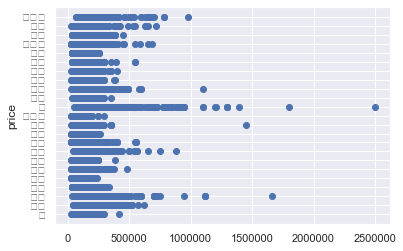

In [9]:
plt.scatter(x=train['賃料'], y=train['state'])
plt.ylabel('price')

## アクセスの分析

In [10]:
train['way_cnt'] = train['アクセス'].apply(lambda x: len(x.split('\t')))
train['way_cnt'].value_counts()

11    27079
7      1745
3      1486
13      895
9       265
Name: way_cnt, dtype: int64

In [11]:
train[train['way_cnt'] == 3]['アクセス'].apply(lambda x: x.split('\t'))

61                              [東急目黒線, 西小山駅, 徒歩10分]
72                            [常磐線, 金町(東京都)駅, 徒歩18分]
151                               [東西線, 西葛西駅, 徒歩11分]
185                               [都営浅草線, 馬込駅, 徒歩1分]
219                            [京成本線, 堀切菖蒲園駅, 徒歩12分]
                            ...                     
31342    [常磐線, 金町(東京都)駅, /バス(15分)京成バス「西水元２丁目」下車徒歩2分]
31376                            [東急目黒線, 大岡山駅, 徒歩5分]
31406                        [小田急小田原線, 千歳船橋駅, 徒歩12分]
31448                          [西武池袋線, 石神井公園駅, 徒歩8分]
31453                            [都営新宿線, 瑞江駅, 徒歩11分]
Name: アクセス, Length: 1486, dtype: object

In [12]:
train[train['way_cnt'] == 7]['アクセス'].apply(lambda x: x.split('\t'))

11                [京成本線, 京成小岩駅, 徒歩15分, , 京成本線, 江戸川駅, 徒歩7分]
13       [中央線（快速）, 阿佐ケ谷駅, 徒歩8分, , 丸ノ内線(池袋－荻窪), 南阿佐ケ谷駅, ...
17                [都営新宿線, 一之江駅, 徒歩8分, , 都営新宿線, 船堀駅, 徒歩30分]
31                   [東西線, 葛西駅, 徒歩11分, , 東西線, 西葛西駅, 徒歩18分]
38             [西武池袋線, 東長崎駅, 徒歩1分, , 都営大江戸線, 落合南長崎駅, 徒歩9分]
                               ...                        
31405                 [東西線, 葛西駅, 徒歩9分, , 東西線, 西葛西駅, 徒歩16分]
31410       [東武東上線, 東武練馬駅, 徒歩6分, , 副都心線, 平和台(東京都)駅, 徒歩19分]
31418              [総武本線, 馬喰町駅, 徒歩4分, , 都営浅草線, 浅草橋駅, 徒歩4分]
31422            [南北線, 王子神谷駅, 徒歩10分, , 京浜東北線, 東十条駅, 徒歩20分]
31457           [西武池袋線, 江古田駅, 徒歩12分, , 西武有楽町線, 新桜台駅, 徒歩6分]
Name: アクセス, Length: 1745, dtype: object

In [13]:
train[train['way_cnt'] == 9]['アクセス'].apply(lambda x: x.split('\t'))

12       [銀座線, 表参道駅, 徒歩11分, , 千代田線, 表参道駅, 徒歩11分, , 山手線渋...
30       [副都心線, 雑司が谷駅, 徒歩7分, , 山手線, 目白駅, 徒歩12分, , 東京メトロ...
242      [有楽町線, 月島駅, 徒歩1分, , 都営大江戸線, 勝どき駅, 徒歩10分, , 京葉線...
419      [東急池上線, 石川台駅, 徒歩8分, , 東急大井町線, 緑が丘(東京都)駅, 徒歩15分...
475      [京葉線(東京－蘇我), 八丁堀(東京都)駅, 徒歩4分, , 日比谷線, 八丁堀(東京都)...
                               ...                        
30705    [日暮里・舎人ライナー, 江北駅, 徒歩12分, , 日暮里・舎人ライナー, 高野(東京都)...
30722    [総武線・中央線（各停）, 大久保(東京都)駅, 徒歩10分, , 山手線, 新大久保駅, ...
31050    [千代田線, 明治神宮前駅, 徒歩6分, , 山手線, 原宿駅, 徒歩8分, , 東京メトロ...
31276    [中央線（快速）, 中野(東京都)駅, 徒歩9分, , 東西線, 中野(東京都)駅, 徒歩9...
31288    [千代田線, 千駄木駅, 徒歩5分, , 千代田線, 根津駅, 徒歩6分, , 東京メトロ南...
Name: アクセス, Length: 265, dtype: object

In [14]:
train[train['way_cnt'] == 11]['アクセス'].apply(lambda x: x.split('\t'))

0        [都営三田線, 西巣鴨駅, 徒歩4分, , 埼京線, 板橋駅, 徒歩14分, , 都電荒川線...
1        [都営大江戸線, 勝どき駅, 徒歩5分, , 有楽町線, 月島駅, 徒歩9分, , 日比谷線...
2        [京王線, 笹塚駅, 徒歩6分, , 京王線, 代田橋駅, 徒歩7分, , 京王線, 明大前...
3        [総武線・中央線（各停）, 高円寺駅, 徒歩9分, , 丸ノ内線(池袋－荻窪), 新高円寺駅...
4        [京成金町線, 京成金町駅, 徒歩5分, , 常磐線, 金町(東京都)駅, 徒歩7分, , ...
                               ...                        
31465    [都営三田線, 蓮根駅, 徒歩7分, , 都営三田線, 西台駅, 徒歩10分, , 都営三田...
31466    [東急田園都市線, 三軒茶屋駅, 徒歩6分, , 東急世田谷線, 西太子堂駅, 徒歩4分, ...
31467    [東西線, 南砂町駅, 徒歩5分, , 都営新宿線, 大島(東京都)駅, 徒歩26分, , ...
31468    [中央線（快速）, 中野(東京都)駅, 徒歩4分, , 丸ノ内線(池袋－荻窪), 新中野駅,...
31469    [有楽町線, 千川駅, 徒歩5分, , 有楽町線, 要町駅, 徒歩13分, , 西武池袋線,...
Name: アクセス, Length: 27079, dtype: object

In [15]:
train[train['way_cnt'] == 13]['アクセス'].apply(lambda x: x.split('\t'))

20       [西武新宿線, 沼袋駅, 徒歩11分, , 西武新宿線, 野方駅, 徒歩14分, , 中央線...
78       [中央線（快速）, 中野(東京都)駅, 徒歩3分, , 丸ノ内線(池袋－荻窪), 東高円寺駅...
172      [中央線（快速）, 中野(東京都)駅, 徒歩5分, , 丸ノ内線(池袋－荻窪), 新中野駅,...
193      [京浜東北線, 大森(東京都)駅, 徒歩14分, , 京急本線, 平和島駅, 徒歩19分, ...
216      [京浜東北線, 大森(東京都)駅, 徒歩5分, , 京急本線, 平和島駅, 徒歩15分, ,...
                               ...                        
31278    [東武東上線, 下板橋駅, 徒歩2分, , 都営三田線, 新板橋駅, 徒歩11分, , 埼京...
31287    [中央線（快速）, 荻窪駅, 徒歩9分, , 中央線（快速）, 西荻窪駅, 徒歩22分, ,...
31322    [東急池上線, 池上駅, 徒歩4分, , 東急多摩川線, 矢口渡駅, 徒歩20分, , 京浜...
31423    [京急本線, 平和島駅, 徒歩2分, , 京急本線, 大森町駅, 徒歩10分, , 京浜東北...
31444    [東西線, 高田馬場駅, 徒歩8分, , 副都心線, 西早稲田駅, 徒歩7分, , 山手線,...
Name: アクセス, Length: 895, dtype: object

In [16]:
def replace_way_cnt(_tmp):
    _cnt = len(_tmp.split('\t'))
    if _cnt == 3:
        _way = 1
    elif _cnt >= 7 and _cnt <=9:
        _way = 2
    else:
        _way = 3
    return _way
    
train['way_cnt'] = train['アクセス'].apply(replace_way_cnt)
train['way_cnt'].value_counts()

3    27974
2     2010
1     1486
Name: way_cnt, dtype: int64

In [17]:
'''
基本形　線名、駅、駅までの距離
3: 基本形
7: 基本形 x 2
9: 基本形 x 2 + 1
11: 基本形 x 3
13: 基本形 x 3 + 1

3～13

3      1486
7      1745
9       265
11    27079
13      895
'''

'\n基本形\u3000線名、駅、駅までの距離\n3: 基本形\n7: 基本形 x 2\n9: 基本形 x 2 + 1\n11: 基本形 x 3\n13: 基本形 x 3 + 1\n\n3～13\n\n3      1486\n7      1745\n9       265\n11    27079\n13      895\n'

In [19]:
plt.bar(train['賃料'], train['way_cnt'])

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000018A93F3B8B8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018A94016AF8> (for post_execute):



KeyboardInterrupt



## 築年数を分析

In [ ]:
train['築年数'].value_counts()

In [ ]:
# 9年9ヶ月
build = DataFrame(train[['賃料', '築年数']])

def build_count(check):
    if check == '新築':
        count = 0
    else:
        year = check.split('年')[0]
        month = check.split('年')[1].split('ヶ月')[0]
        count = int(year) * 12 + int(month)
    return count

build['築年数（月）'] = build['築年数'].apply(build_count)
build.head()

In [ ]:
build = build[build['築年数（月）'] < 5000]

In [ ]:
sns.pairplot(build)

In [ ]:
build.describe()

In [ ]:
build['賃料'].min()

In [ ]:
build['賃料'].max()

## 所在階の分析

In [ ]:
train['所在階'].value_counts()

In [ ]:
level_cnt = train['所在階'].apply(lambda x: len(x.split('／')))
level_cnt

In [ ]:
level_cnt[level_cnt == 1]

In [ ]:
train[level_cnt == 1]['所在階'].value_counts()

## 建物構造

In [ ]:
train['建物構造'].value_counts()

# 標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#build['築年数（月）'] = build['築年数（月）'] / build['築年数（月）'].max()
#build['築年数（月）']

# 分析

## 所在地と間取りだけで線形分析

In [ ]:
X = train[['所在地', '間取り', '建物構造', '賃料']]
X = pd.concat([X, build['築年数（月）']], axis=1)
X = X[X['築年数（月）'] < 5000]
X['築年数（月）'] = X['築年数（月）'] / X['築年数（月）'].max()
X['区'] = X['所在地'].apply(lambda x: x[3:].split('区')[0])
X.drop('所在地', inplace=True, axis=1)
X = pd.get_dummies(X, drop_first=True)
X

In [ ]:
y = X.pop('賃料')

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.8)

In [ ]:
lr = LinearRegression()
lr.fit(train_x, train_y)

In [ ]:
lr.score(train_x, train_y)